
# Churn model development

### Table of Contents

1. [Dependencies](#Dependencies)
2. [Data cleaning](#Datacleaning)
3. [Pre-processing](#Pre-processing)
4. [Model selection](#Modelselection)
5. [Fit models](#fitmodels)
6. [Model validation](#modelvalidation)
7. [Retention assessment](#Retentionassessment) 

### 1. Dependencies <a class="anchor" id="Dependencies"></a>

In [1]:
# Import dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model and data processing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.preprocessing import MinMaxScaler, MinMaxScaler

# Model and pipeline build

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model validation
from sklearn.metrics import (roc_auc_score, f1_score, accuracy_score, plot_confusion_matrix,
                             classification_report, make_scorer, plot_roc_curve, plot_precision_recall_curve)
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

# save model
import joblib



### 2. Data cleaning <a class="anchor" id="Datacleaning"></a>

In [2]:
# Read in data
df =pd.read_csv('../01 Data/raw__churn_challenge__20210821.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Convert Total Charges to a numeric data type and confirm
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 3. Pre-processing <a class="anchor" id="Pre-processing"></a>

In [8]:
# Remove missing values 
# Missing values account for a small proportion of total values 
df.dropna(inplace = True)
# Remove customer IDs from the data set
df2 = df.iloc[:,1:]

In [9]:
# Convert the predictor variable in to a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [10]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
#Convert all categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [12]:
# split into x_train and x_val
X_train = df_dummies.drop(['Churn'], axis=1)
y_train = df_dummies['Churn']

In [13]:
# This isn't a massive dataset so use a larger split, also need to stratify by churn
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=.30)

In [14]:
# Create a min max scaler
mms = MinMaxScaler()
#fit scaler to train
X_train = pd.DataFrame(mms.fit(X_train).transform(X_train), columns = X_train.columns)

# fit scaler to validation set
X_val = pd.DataFrame(mms.fit(X_val).transform(X_val), columns = X_train.columns)

In [15]:
# Develop folds for Kfold testing, make sure folds are stratified by churn, use constant seed to allow repeatable results
n_folds = 10
seed = 3
kfold = StratifiedKFold(n_splits=n_folds, random_state=seed, shuffle=True)

### 4. Model selection <a class="anchor" id="Modelselection"></a>

In [16]:
# Build list of models to run

clf_mdls = []

clf_mdls.append(("LogReg", LogisticRegression(penalty = 'l2', class_weight = 'balanced')))

clf_mdls.append(("GaussianNB", GaussianNB()))

clf_mdls.append(("DecisionTrees", DecisionTreeClassifier()))

clf_mdls.append(("RandomForest", RandomForestClassifier()))

clf_mdls.append(("XGB", XGBClassifier()))

### 5. Fit models <a class="anchor" id="fitmodels"></a>

In [17]:
dff1 = pd.DataFrame(columns = ['model', 'f1'], index = None)
df_temp = pd.DataFrame(columns = ['model', 'f1'], index = None)
results, names  = [], []
score = 'f1'

# Fit each model using k-fold validation and store results in dataframe
for name, model  in clf_mdls:
    # get cross validation results
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=score, n_jobs=-1)
    
    
    # store results in temporary dataframe
    df_temp = pd.DataFrame([[score, name] for score in cv_results],
                           columns = ['f1', 'model'])
    
    dff1 = pd.concat([dff1, df_temp], ignore_index = True)   
    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)

LogReg: 0.630067 (+/- 0.019863)
GaussianNB: 0.599442 (+/- 0.016842)
DecisionTrees: 0.497996 (+/- 0.015928)
RandomForest: 0.548817 (+/- 0.036486)
XGB: 0.574003 (+/- 0.025286)


In [18]:
dff1.head()

,model,f1
0,LogReg,0.605714
1,LogReg,0.616352
2,LogReg,0.610778
3,LogReg,0.620061
4,LogReg,0.641618


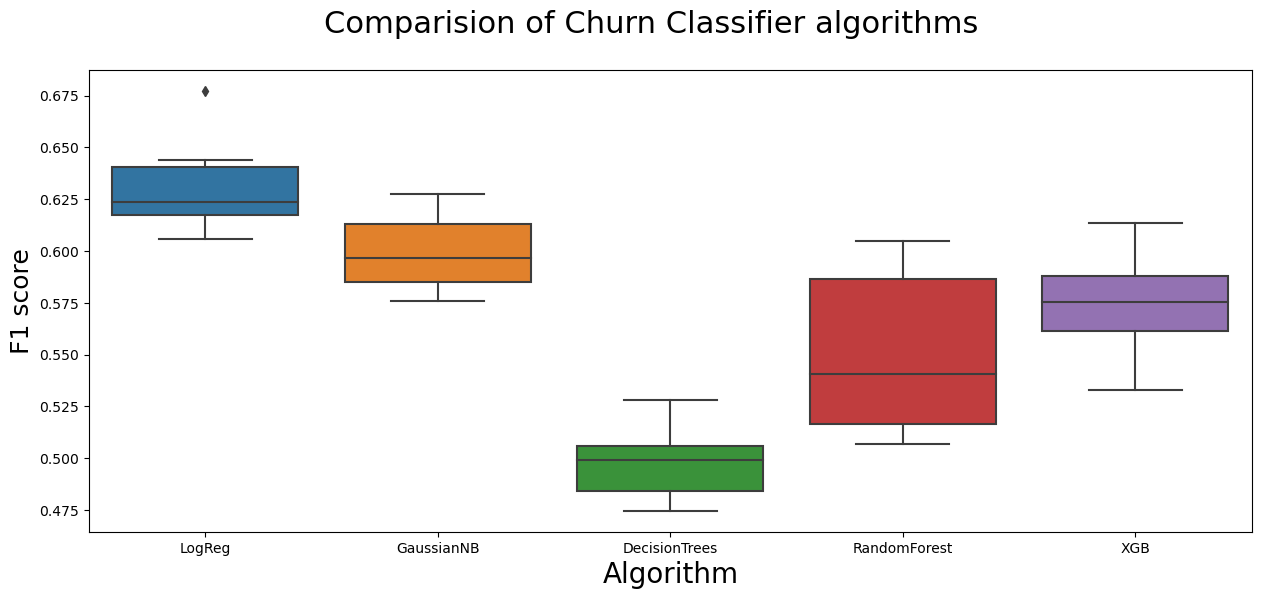

In [19]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Comparision of Churn Classifier algorithms', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x='model', y='f1', data=dff1)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithm", fontsize=20)
ax.set_ylabel("F1 score", fontsize=18)
ax.set_xticklabels(dff1['model'].unique().tolist())

plt.show()

### 5. Model validation <a class="anchor" id="modelvalidation"></a>

In [20]:
# Create logistic regression model
logreg = LogisticRegression(penalty = 'l2', class_weight = 'balanced')

In [21]:
# Fit the model to X and y training data
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [22]:
# Make predictions in training and validation data sets
y_hat_train = logreg.predict(X_train)
y_hat_val = logreg.predict(X_val)

In [23]:
target_names = ['Not churn', 'Churn']
print(classification_report(y_train,y_hat_train, target_names=target_names))

              precision    recall  f1-score   support

   Not churn       0.91      0.73      0.81      3614
       Churn       0.52      0.81      0.63      1308

    accuracy                           0.75      4922
   macro avg       0.72      0.77      0.72      4922
weighted avg       0.81      0.75      0.77      4922



In [24]:
print(classification_report(y_val,y_hat_val, target_names=target_names))

              precision    recall  f1-score   support

   Not churn       0.91      0.73      0.81      1549
       Churn       0.51      0.79      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



In [25]:
y_prob = logreg.predict_proba(X_train)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
logreg.score(X_train, y_hat_train)

1.0

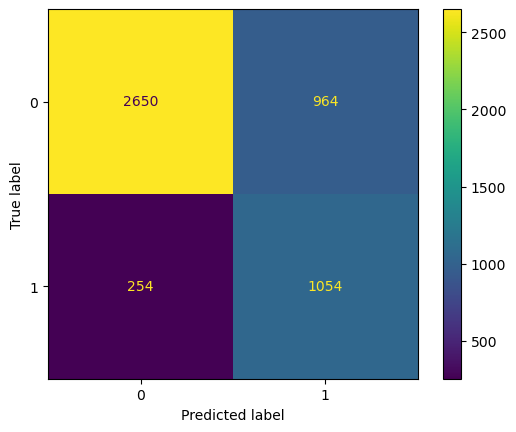

In [26]:
# plot confusion matrix for training
plot_confusion_matrix(logreg, X_train, y_train)
plt.show() 

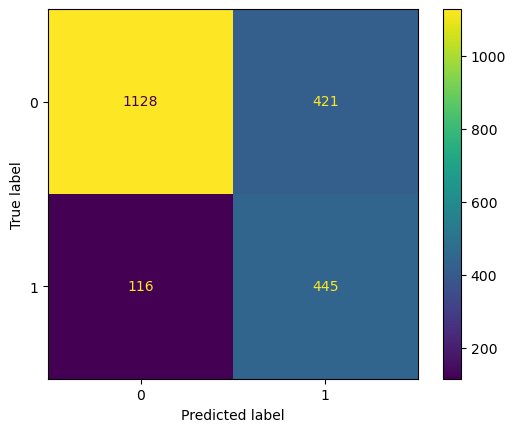

In [27]:
# plot confusion matrix for validation
plot_confusion_matrix(logreg, X_val, y_val)
plt.show() 

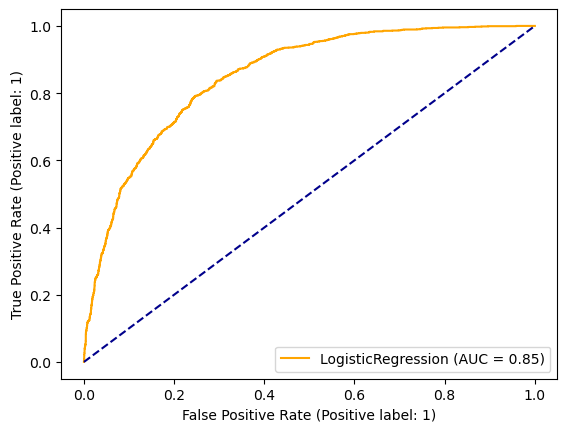

In [28]:
plot_roc_curve(logreg, X_train, y_train, color='orange')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show() 

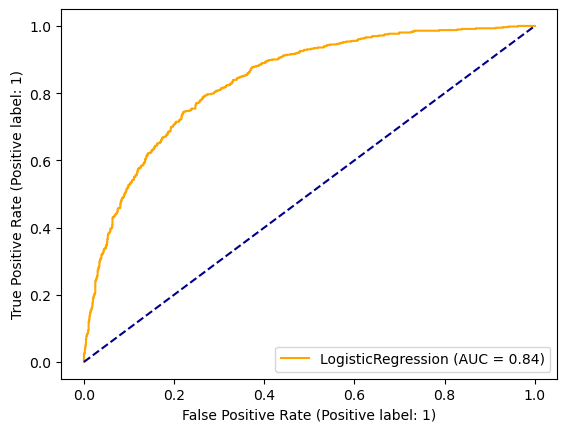

In [29]:
plot_roc_curve(logreg, X_val, y_val, color='orange')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show() 

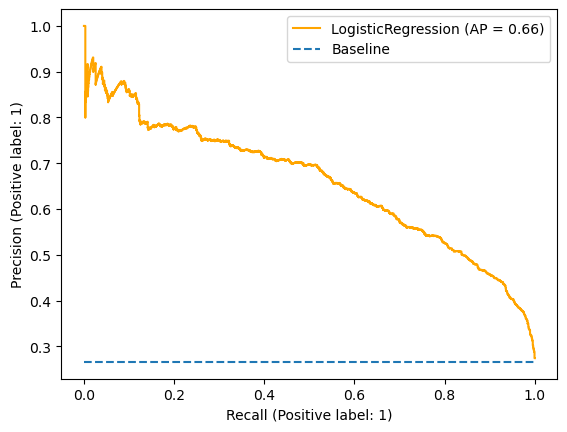

In [30]:
plot_precision_recall_curve(logreg, X_train, y_train, color='orange')
baseline = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
plt.legend(loc = 'best')
plt.show()

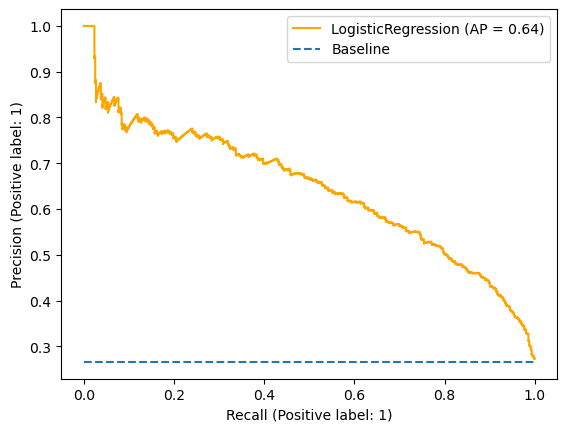

In [31]:
plot_precision_recall_curve(logreg, X_val, y_val, color='orange')
baseline = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
plt.legend(loc = 'best')
plt.show()

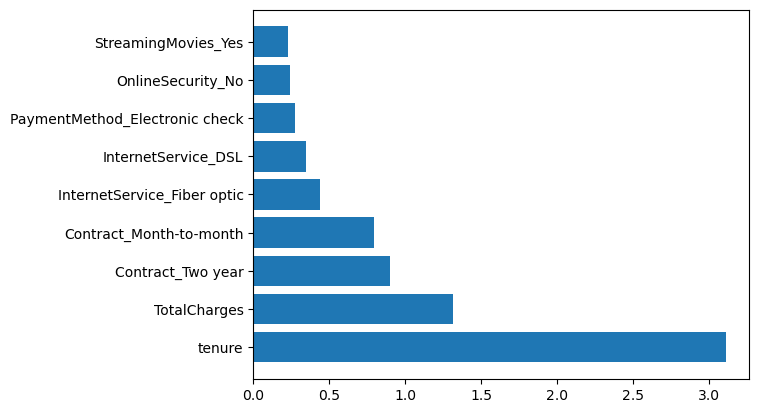

In [32]:
# get importance
importance = pd.DataFrame(abs(logreg.coef_[0]))

d = {'importance':abs(logreg.coef_[0]),'label':X_train.columns}
df_imp = pd.DataFrame(d)

df_imp.sort_values('importance', axis = 0, ascending = False, inplace = True)

imp_df = df_imp[0:9].copy()

plt.barh(y = 'label', width = 'importance', data = imp_df)
plt.show()

### 6. Retention assessment <a class="anchor" id="Retentionassessment"></a>

In [58]:
# Create DataFrame using the probability a customer will churn
d = {'Churn_prob':logreg.predict_proba(X_train)[:,1], 'Churned': y_train}
df_train = pd.DataFrame(d)
df_train['Churned'] = df_train['Churned'].replace([0,1],['No', 'Yes'])

# create bins
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]


# create labels to assign to each bin
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# create a new column and use bins to assign risk
df_train['Churnrisk'] = pd.cut(df_train['Churn_prob'], bins, labels=labels)

# display updated DataFrame
df_train.head()

,Churn_prob,Churned,Churnrisk
374,0.676155,No,High
2176,0.008266,No,Very low
3885,0.878600,No,Very high
5413,0.783910,No,High
2475,0.069634,No,Very low


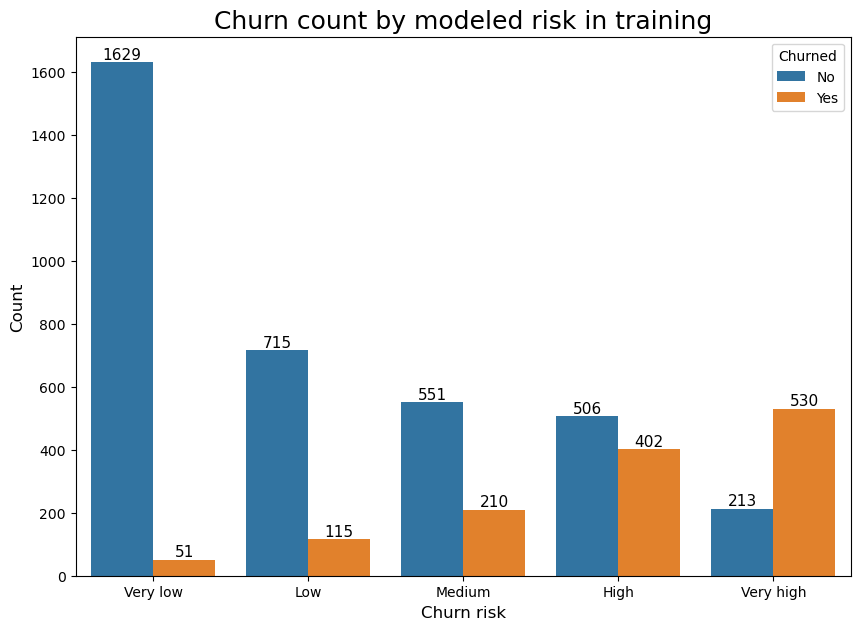

In [61]:
label_order = ['Very low', 'Low', 'Medium', 'High', 'Very high']
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="Churnrisk", hue='Churned', data=df_train, order = label_order)
ax.set_title('Churn count by modeled risk in training',fontsize = 18)
ax.set_xlabel('Churn risk', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.show()

In [59]:
# Create DataFrame using the probability a customer will churn
d = {'Churn_prob':logreg.predict_proba(X_val)[:,1], 'Churned': y_val}
df_val = pd.DataFrame(d)
df_val['Churned'] = df_val['Churned'].replace([0,1],['No', 'Yes'])

# create bins
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]


# create labels to assign to each bin
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# create a new column and use bins to assign risk
df_val['Churnrisk'] = pd.cut(df_val['Churn_prob'], bins, labels=labels)

# display updated DataFrame
df_val.head()

,Churn_prob,Churned,Churnrisk
3492,0.653598,No,High
3391,0.358049,No,Low
3313,0.456055,No,Medium
4216,0.025065,No,Very low
2089,0.029761,No,Very low


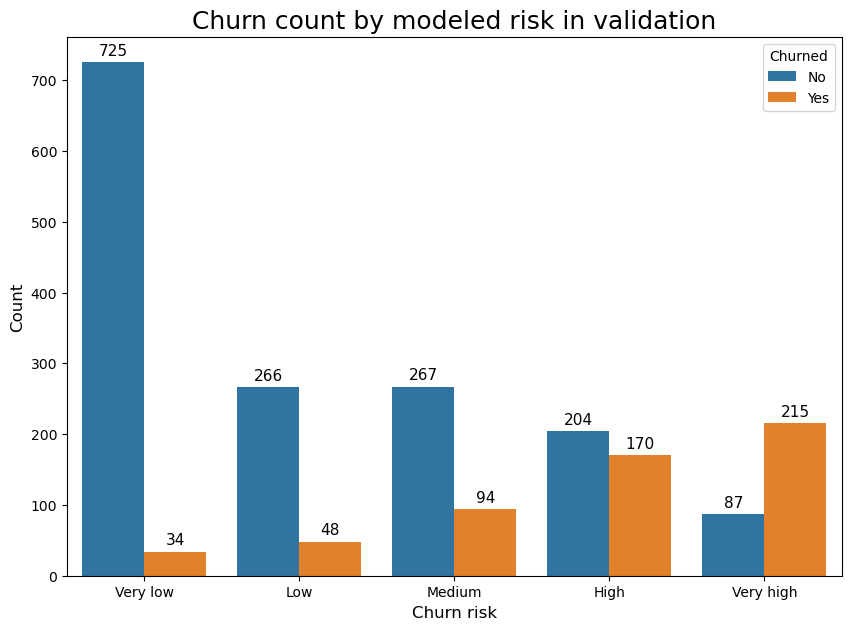

In [55]:
label_order = ['Very low', 'Low', 'Medium', 'High', 'Very high']
plt.subplots(figsize = (10,7))
ax = sns.countplot(x="Churnrisk", hue='Churned', data=df_val, order = label_order)
ax.set_title('Churn count by modeled risk in validation',fontsize = 18)
ax.set_xlabel('Churn risk', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height()+ 10, rect.get_height()
             ,horizontalalignment='center', fontsize = 11)
plt.show()

In [62]:
df['TotalCharges'].median()

1397.475

Median total charge for customer is $1400
assume cost $500 to acquire and $100 retain customer
assume retained customer 